In [4]:
from matplotlib import pyplot as plt
import numpy as np


def show_widths_info(widths):
    """
    周期分極構造のwidths配列の情報を表示する関数

    Args:
        widths: 分極ドメインの幅リスト
    """
    # NumPy配列に変換（もしJAX配列の場合）
    if hasattr(widths, 'tolist'):
        widths_np = np.array(widths)
    else:
        widths_np = np.array(widths)

    # 基本統計情報
    min_width = np.min(widths_np)
    max_width = np.max(widths_np)
    avg_width = np.mean(widths_np)
    total_length = np.sum(widths_np)
    num_domains = len(widths_np)

    # 結果の表示
    print(f"周期分極構造の情報:")
    print(f"総ドメイン数: {num_domains}")
    print(f"総長: {total_length:.4f} µm")
    print(f"平均幅: {avg_width:.4f} µm")
    print(f"最小幅: {min_width:.4f} µm")
    print(f"最大幅: {max_width:.4f} µm")

    # グラフ表示
    plt.figure(figsize=(12, 8))

    # サブプロット1: ドメイン幅のプロット
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(widths_np)), widths_np * 1e6, 'b-')
    plt.xlabel('ドメインインデックス')
    plt.ylabel('ドメイン幅 (μm)')
    plt.title(f'周期分極構造のドメイン幅')
    plt.grid(True, alpha=0.3)
    plt.show()

    # 幅の分布もヒストグラムで表示
    plt.figure(figsize=(10, 6))
    plt.hist(widths_np * 1e6, bins=30, alpha=0.7, color='green')
    plt.xlabel('ドメイン幅 (μm)')
    plt.ylabel('頻度')
    plt.title('ドメイン幅の分布')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

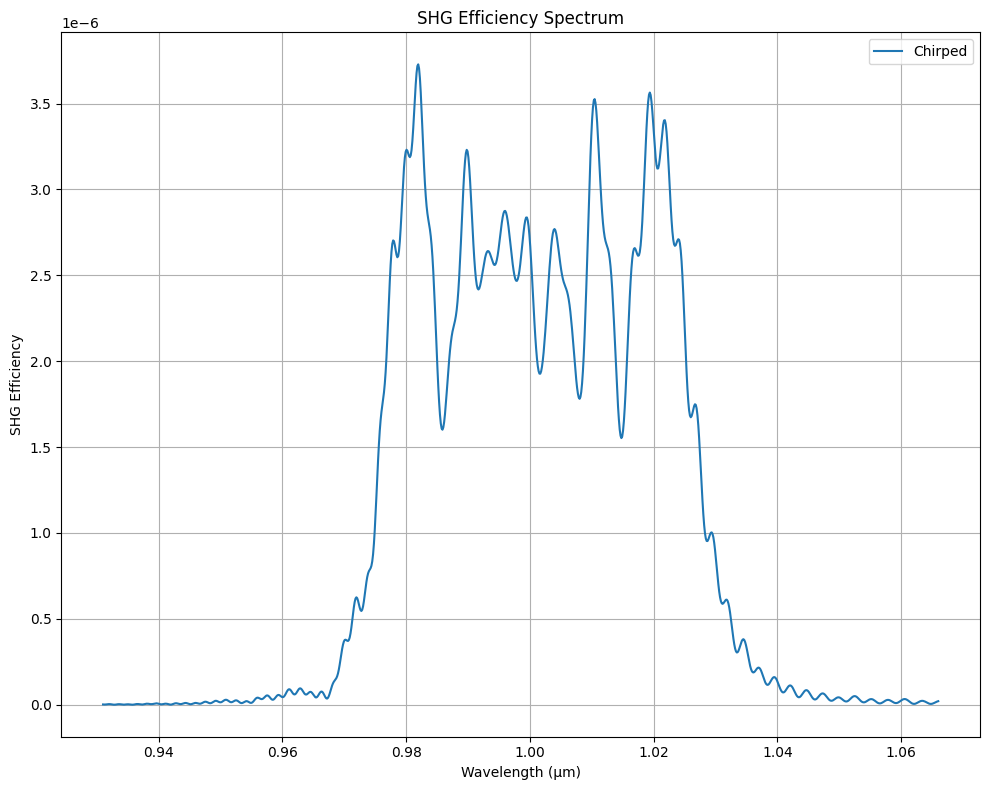

In [1]:
from syuron import shg2
import jax.numpy as jnp
import matplotlib.pyplot as plt


# チャープドドメイン幅生成
def create_widths(L, Lambda0, chirp=0.0):
    widths, z = [], 0.0
    while z < L:
        current = Lambda0 / (1 + chirp * z)
        widths.append(current / 2)
        z += current
    return widths


# 均一なドメイン幅
chirp = create_widths(2000, 7.2, 0.0001)
pp1 = [3.6] * round(sum(chirp)/3.6)
pp2 = [3.4] * round(sum(chirp)/3.4)


wavelengths = jnp.linspace(0.931, 1.066, 1000).tolist()

params = shg2.SpectrumParams(
    domain_widths_dim=[pp1, pp2, chirp],
    kappa_magnitude_dim=[1.31E-5],
    T_dim=[70],
    wavelength_dim=wavelengths,
    fund_power_dim=[1],
    sh_power_dim=[0]
)

eff_tensor = shg2.analyzeSpectrum(params)

plt.figure(figsize=(10, 8))
labels = ["Uniform 3.6", "Uniform 3.4", "Chirped"]
# for i, label in enumerate(labels):
#     eff_line = eff_tensor[i, 0, 0, :, 0, 0]
#     plt.plot(wavelengths, eff_line, label=label)
eff_line = eff_tensor[2, 0, 0, :, 0, 0]
plt.plot(wavelengths, eff_line, label="Chirped")
plt.xlabel("Wavelength (μm)")
plt.ylabel("SHG Efficiency")
plt.title("SHG Efficiency Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()